## Our first tiny Machine Learning application
### Reading the data
Data: `data/web_traffic.tsv`


In [8]:
import scipy as sp
data = sp.genfromtxt("data/web_traffic.tsv", delimiter="\t")
print(data.shape)
print(data[0:5, 0:2])

(743, 2)
[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00              nan]
 [  3.00000000e+00   1.38600000e+03]
 [  4.00000000e+00   1.36500000e+03]
 [  5.00000000e+00   1.48800000e+03]]


In [10]:
## separate data into two vectors
x = data[:, 0]
y = data[:, 1]
print(sp.sum(sp.isnan(y)))
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

8


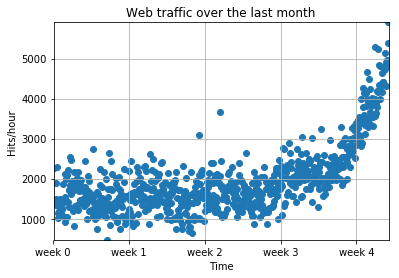

In [11]:
## Plot the trafic
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
     ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()
plt.show()

### Choosing the right model and learning algorithm
#### Before building our first model
How to estimate the error of the model:
```python
def error(f, x, y):
       return sp.sum((f(x)-y)**2)
```

In [16]:
def error(f, x, y):
       return sp.sum((f(x)-y)**2)

#### Starting with a simple line
Function: SciPu's plotfit() function
```python
sp.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
```

In [14]:
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)
print("Model parameters: %s" %  fp1)
print(residuals)

Model parameters: [   2.59619213  989.02487106]
[  3.17389767e+08]


This means that the best straight line  t is the following function:

`f(x) = 2.59619213 * x + 989.02487106`

We then use poly1d() to create a model function from the model parameters.

In [17]:
f1 = sp.poly1d(fp1)
print(error(f1, x, y))

317389767.34


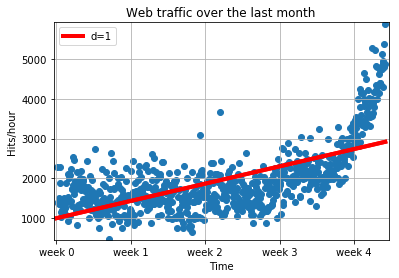

In [22]:
## add the prediction to the plot
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
     ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()

fx = sp.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=4, color="red")
plt.legend(["d=%i" % f1.order], loc="upper left")
plt.show()

Degree: 01, the error is 317389767.339778
Degree: 02, the error is 179983507.878179
Degree: 03, the error is 139350144.031725
Degree: 10, the error is 121942326.363771


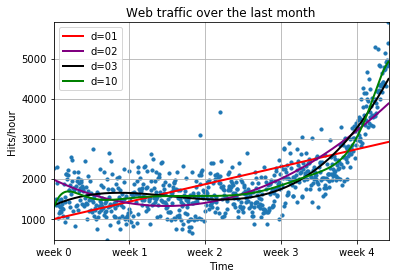

In [71]:
### fit higer degree model
plt.scatter(x,y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
     ['week %i'%w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()
fx = sp.linspace(0,x[-1], 1000)


ds = [1, 2, 3, 10]
colors = ["red", "purple", "black", "green", "blue"]
for index in range(len(ds)):
    fp, residuals, rank, sv, rcond = sp.polyfit(x, y, ds[index], full=True)
    print("Degree: %02i, the error is %f" %  (ds[index], residuals) )
    ff = sp.poly1d(fp)
    plt.plot(fx, ff(fx), linewidth=2, color=colors[index])
        
plt.legend(["d=%02i" % m for m in ds],  loc="upper left")
plt.show()

In [60]:
## a function for plot the models
def plot_models (x, y, models, mx=None, ymax=None, xmin=None):
    '''plot input data'''
    plt.figure(num=None, figsize=(8, 6))
    plt.clf()
    plt.scatter(x, y, s = 10)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks(
        [w * 7 * 24 for w in range(10)], ['week %i' % w for w in range(10)])
    colors = ['g', 'k', 'b', 'm', 'r']
    linestyles = ['-', '-.', '--', ':', '-']
    # for models
    if models:
        if mx is None:
             mx = sp.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)
        plt.legend(["d=%i" % m.order for m in models], loc="upper left")
    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')
    plt.show()
    #plt.savefig(fname)

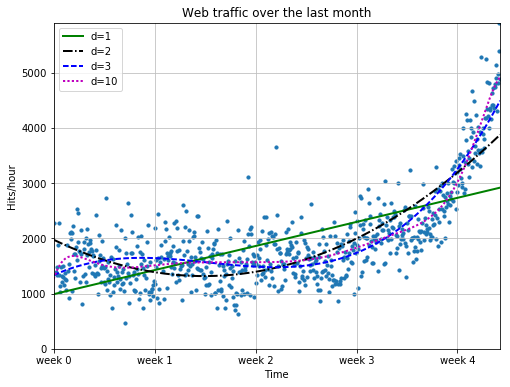

In [62]:
f1 = sp.poly1d(sp.polyfit(x, y, 1))
f2 = sp.poly1d(sp.polyfit(x, y, 2))
f3 = sp.poly1d(sp.polyfit(x, y, 3))
f10 = sp.poly1d(sp.polyfit(x, y, 10))

plot_models(x, y, [f1, f2, f3, f10])

### Stepping back to go forward
So, we step back and take another look at the data. It seems that there is an in ection point between weeks 3 and 4. So let us separate the data and train two lines using week 3.5 as a separation point. We train the  rst line with the data up to week 3, and the second line with the remaining data.

In [75]:
inflection = int(3.5*7*24) # calculate the inflection point in hours
xa = x[:inflection] # data before the inflection point
ya = y[:inflection]
xb = x[inflection:] # data after
yb = y[inflection:]

fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))
fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)
print("Error inflection=%f" % (fa_error + fb_error))


Error inflection=132950348.197616


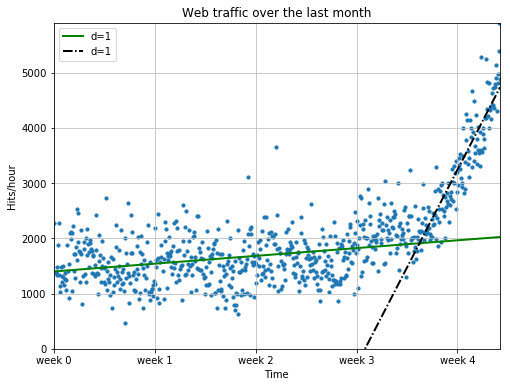

In [76]:
plot_models(x,y,[fa, fb])

why do we trust the straight line  tted only at the last week of our data more than any of the more complex models? It is because we assume that it will capture future data better. If we plot the models into the future, we see how right we are (d=1 is again our initially straight line).

In [80]:
def error(f, x, y):
    return sp.sum((f(x) - y) ** 2)

print("Errors for the complete data set:")
for f in [f1, f2, f3, f10]:
    print("Error d=%i: %f" % (f.order, error(f, x, y)))

print("Errors for only the time after inflection point")
for f in [f1, f2, f3, f10]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

print("Error inflection=%f" % (error(fa, xa, ya) + error(fb, xb, yb)))

Errors for the complete data set:
Error d=1: 317389767.339778
Error d=2: 179983507.878179
Error d=3: 139350144.031725
Error d=10: 121942326.363526
Errors for only the time after inflection point
Error d=1: 145045835.134473
Error d=2: 61116348.809620
Error d=3: 33214248.905597
Error d=10: 21611594.263988
Error inflection=132950348.197616


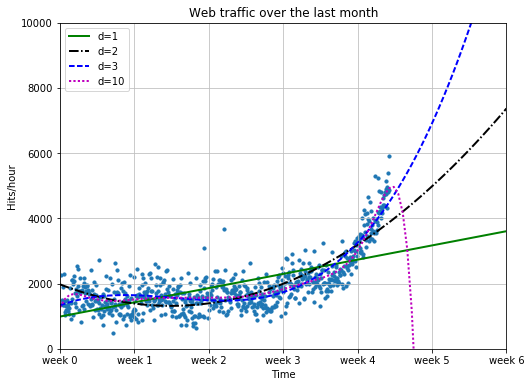

In [83]:
# extrapolating into the future
plot_models(
    x, y, [f1, f2, f3, f10],
    mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)


Trained only on data after inflection point
Errors for only the time after inflection point
Error d=1: 22143941.107618
Error d=2: 19768846.989176
Error d=3: 19766452.361027
Error d=10: 18949296.782997
Error d=50: 18337351.727396


/Users/shichenwang/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/shichenwang/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


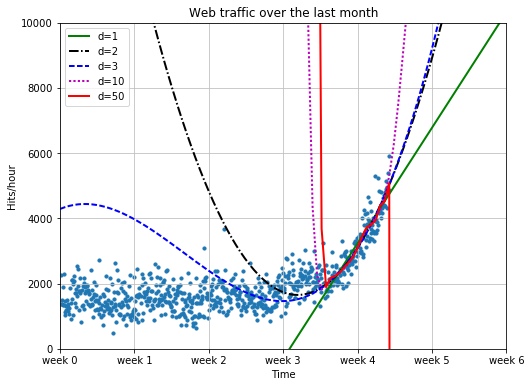

In [86]:
print("Trained only on data after inflection point")
fb1 = fb
fb2 = sp.poly1d(sp.polyfit(xb, yb, 2))
fb3 = sp.poly1d(sp.polyfit(xb, yb, 3))
fb10 = sp.poly1d(sp.polyfit(xb, yb, 10))
fb100 = sp.poly1d(sp.polyfit(xb, yb, 50))

print("Errors for only the time after inflection point")
for f in [fb1, fb2, fb3, fb10, fb100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

plot_models(
    x, y, [fb1, fb2, fb3, fb10, fb100],
    mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)

In [93]:
## separating testing from training
frac = 0.3
split_idx = int(frac * len(xb))
shuffled = sp.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])
fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))
print("fbt2(x)= \n%s" % fbt2)
print("fbt2(x)-100,000= \n%s" % (fbt2-100000))

fbt2(x)= 
         2
0.09098 x - 100.1 x + 2.931e+04
fbt2(x)-100,000= 
         2
0.09098 x - 100.1 x - 7.069e+04


/Users/shichenwang/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/Users/shichenwang/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


Test errors for only the time after inflection point
Error d=1: 5588280.537656
Error d=2: 5505355.087517
Error d=3: 5506315.217831
Error d=10: 5692559.319861
Error d=50: 6744253.098828


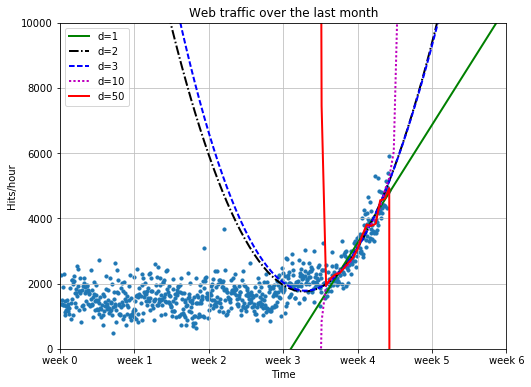

In [94]:
fbt3 = sp.poly1d(sp.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(sp.polyfit(xb[train], yb[train], 10))
fbt50 = sp.poly1d(sp.polyfit(xb[train], yb[train], 50))

print("Test errors for only the time after inflection point")
for f in [fbt1, fbt2, fbt3, fbt10, fbt50]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))

plot_models(
    x, y, [fbt1, fbt2, fbt3, fbt10, fbt50],
    mx=sp.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)


In [96]:
## d=2 has the lowest error
from scipy.optimize import fsolve
print(fbt2)
print(fbt2 - 100000)
reached_max = fsolve(fbt2 - 100000, x0=800) / (7 * 24)
print(reached_max)
print("100,000 hits/hour expected at week %f" % reached_max[0])

         2
0.09098 x - 100.1 x + 2.931e+04
         2
0.09098 x - 100.1 x - 7.069e+04
[ 9.46139934]
100,000 hits/hour expected at week 9.461399
